In [3]:
# Import dependencies
import pandas as pd
import numpy as np
#import hvplot.pandas
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from IPython.display import clear_output

In [4]:
# Loads the data into a DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/skronheim/project-4/main/Resources/dataset.csv")

df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

# **Cleaning and organizing the data.**

In [7]:
df["track_name"] = df["track_name"].astype('str') 

In [8]:
df["artists"] = df["artists"].astype('str') 

In [11]:
features = ["popularity","danceability", "energy","loudness","tempo"]

In [12]:
df["Artist + Song"] = df[["artists", "track_name"]].apply("-".join, axis=1)

In [13]:
df = df.dropna(subset=features)

In [14]:
df_clean = df.drop(["Unnamed: 0","track_id", "time_signature", "artists", "track_name"], axis=1)
df_clean.head()

,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,Artist + Song
0,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,acoustic,Gen Hoshino-Comedy
1,Ghost (Acoustic),55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,acoustic,Ben Woodward-Ghost - Acoustic
2,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,acoustic,Ingrid Michaelson;ZAYN-To Begin Again
3,Crazy Rich Asians (Original Motion Picture Sou...,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,acoustic,Kina Grannis-Can't Help Falling In Love
4,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,acoustic,Chord Overstreet-Hold On


In [15]:
df_clean.set_index("Artist + Song", inplace = True)
df_clean.head()

,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
Artist + Song,,,,,,,,,,,,,,,,
Gen Hoshino-Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,acoustic
Ben Woodward-Ghost - Acoustic,Ghost (Acoustic),55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,acoustic
Ingrid Michaelson;ZAYN-To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,acoustic
Kina Grannis-Can't Help Falling In Love,Crazy Rich Asians (Original Motion Picture Sou...,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,acoustic
Chord Overstreet-Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,acoustic


In [16]:
data = df_clean[features].copy()
data.head()

,popularity,danceability,energy,loudness,tempo
Artist + Song,,,,,
Gen Hoshino-Comedy,73,0.676,0.4610,-6.746,87.917
Ben Woodward-Ghost - Acoustic,55,0.420,0.1660,-17.235,77.489
Ingrid Michaelson;ZAYN-To Begin Again,57,0.438,0.3590,-9.734,76.332
Kina Grannis-Can't Help Falling In Love,71,0.266,0.0596,-18.515,181.740
Chord Overstreet-Hold On,82,0.618,0.4430,-9.681,119.949


# **Scaling the data.**

In [17]:
data_scaled = StandardScaler().fit_transform(
    data)

In [18]:
 # Create a DataFrame with the scaled data
df_data_scaled = pd.DataFrame(
    data_scaled,
    columns= data.columns
)

# Copy the tickers names from the original data
df_data_scaled["Artist + Song"] = data.index

# Set the Ticker column as index
df_data_scaled = df_data_scaled.set_index("Artist + Song")

# Display sample data
df_data_scaled.head()

,popularity,danceability,energy,loudness,tempo
Artist + Song,,,,,
Gen Hoshino-Comedy,1.782627,0.629244,-0.717148,0.300828,-1.141863
Ben Woodward-Ghost - Acoustic,0.975633,-0.845908,-1.889980,-1.784744,-1.489717
Ingrid Michaelson;ZAYN-To Begin Again,1.065299,-0.742186,-1.122669,-0.293288,-1.528312
Kina Grannis-Can't Help Falling In Love,1.692961,-1.733304,-2.312994,-2.039252,1.987859
Chord Overstreet-Hold On,2.186125,0.295030,-0.788711,-0.282750,-0.073348


# **Using KMeans and plotting the elbow curve.**

In [19]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_data_scaled)
    inertia.append(k_model.inertia_)
    
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}

# Create the DataFrame from the elbow data
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

,k,inertia
0,1,570000.000000
1,2,426555.949042
2,3,356756.517214
3,4,303259.829881
4,5,273630.383597


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

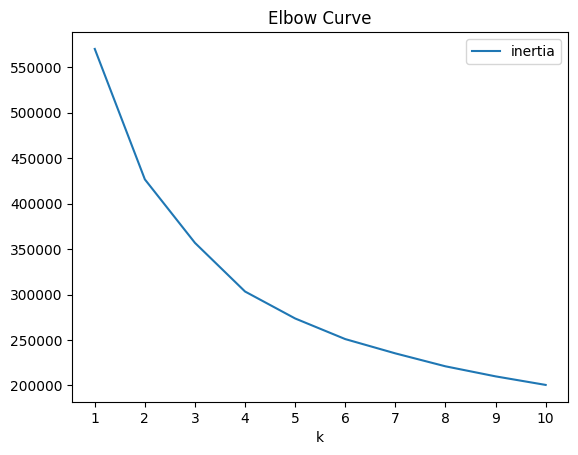

In [20]:
# Plot the DataFrame
df_elbow.plot(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

In [21]:
 # Initialize the K-Means model with n_clusters=3
model = KMeans(n_clusters=4)

# Fit the model for the df_stocks_pca DataFrame
model.fit(df_data_scaled)

# Predict the model segments (clusters)
artist_clusters = model.predict(df_data_scaled)

# Print the stock segments
print(artist_clusters)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 2 0 ... 2 0 1]


In [22]:
 # Create a copy of the df_stocks_pca DataFrame and name it as df_stocks_pca_predictions
df_data_scaled_predictions = df_data_scaled.copy()

# Create a new column in the DataFrame with the predicted clusters
df_data_scaled_predictions["Artist+SongCluster"] = artist_clusters

# Review the DataFrame
df_data_scaled_predictions.head()

,popularity,danceability,energy,loudness,tempo,Artist+SongCluster
Artist + Song,,,,,,
Gen Hoshino-Comedy,1.782627,0.629244,-0.717148,0.300828,-1.141863,0
Ben Woodward-Ghost - Acoustic,0.975633,-0.845908,-1.889980,-1.784744,-1.489717,2
Ingrid Michaelson;ZAYN-To Begin Again,1.065299,-0.742186,-1.122669,-0.293288,-1.528312,0
Kina Grannis-Can't Help Falling In Love,1.692961,-1.733304,-2.312994,-2.039252,1.987859,2
Chord Overstreet-Hold On,2.186125,0.295030,-0.788711,-0.282750,-0.073348,0


# **Plotting the clusters.**

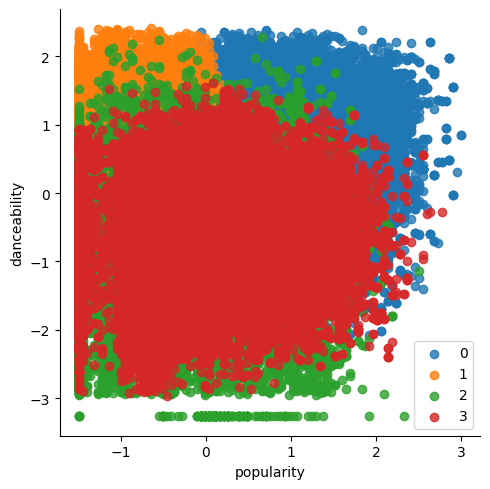

In [23]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt

 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="popularity", y="danceability", data=df_data_scaled_predictions, fit_reg=False, hue='Artist+SongCluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()

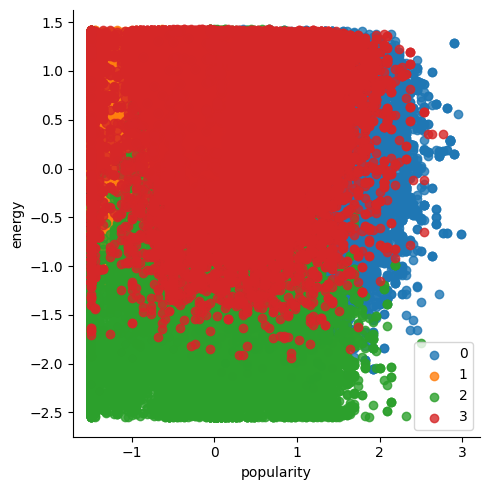

In [35]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt

 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="popularity", y="energy", data=df_data_scaled_predictions, fit_reg=False, hue='Artist+SongCluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()

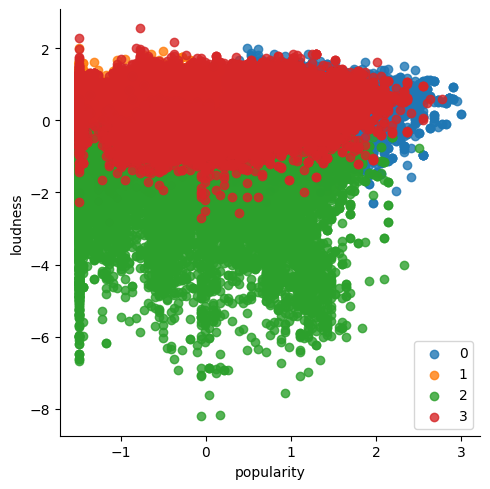

In [30]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt

 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="popularity", y="loudness", data=df_data_scaled_predictions, fit_reg=False, hue='Artist+SongCluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()

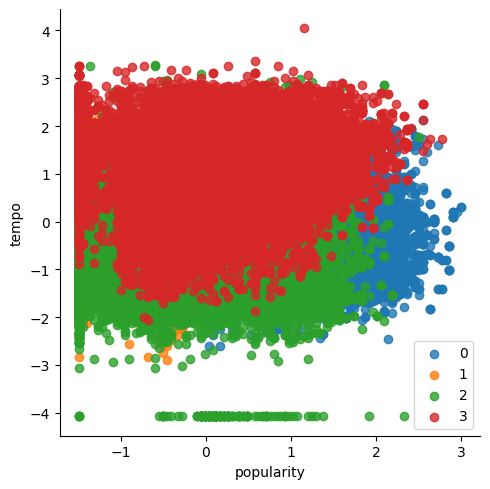

In [32]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt

 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="popularity", y="tempo", data=df_data_scaled_predictions, fit_reg=False, hue='Artist+SongCluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()

# **Songs associated with each cluster.**

In [ ]:
df_data_scaled_predictions[df_data_scaled_predictions["Artist+SongCluster"]== 0].index

In [ ]:
df_data_scaled_predictions[df_data_scaled_predictions["Artist+SongCluster"]== 1].index

In [ ]:
df_data_scaled_predictions[df_data_scaled_predictions["Artist+SongCluster"]== 2].index

In [38]:
df_data_scaled_predictions[df_data_scaled_predictions["Artist+SongCluster"]== 3].index

Index(['Chord Overstreet-All I Want For Christmas Is A Real Good Tan',
       'Eddie Vedder-The Haves',
       'Brandi Carlile;Lucius-You and Me on the Rock',
       'Brandi Carlile;Lucius-You and Me on the Rock',
       'Brandi Carlile-Speak Your Mind (From the Netflix Series "We The People")',
       'Brandi Carlile;Lucius-You and Me on the Rock',
       'Brandi Carlile;Lucius-You and Me on the Rock',
       'Brandi Carlile;Lucius-You and Me on the Rock',
       'Brandi Carlile;Lucius-You and Me on the Rock',
       'Brandi Carlile;Lucius-You and Me on the Rock',
       ...
       'Bethel Music;Bethany Wohrle-Victory Is Yours - Live',
       'Bethel Music;Brian Johnson-We Will Not Be Shaken - Live',
       'Bethel Music;Molly Skaggs-Ain’t No Grave - Live',
       'Planetshakers-Heaven Is My Home - Live',
       'Planetshakers-Come Holy Spirit',
       'Mosaic MSC-Fountain (I Am Good) - Live',
       'Planetshakers-All My Life - Live',
       'Planetshakers-Stay (You Are Good) - Live'

# **Using the PCA method to better represent the features in 2D.**

In [ ]:
 # Create the PCA model instance where n_components=2
pca = PCA(n_components=4)
# Fit the df_stocks_scaled data to the PCA
PCA_data = pca.fit_transform(df_data_scaled)

# Review the first five rose of the PCA data
# using bracket notation ([0:5])
PCA_data[:5]

array([[ 0.35847767, -1.79210449,  1.30317702,  0.38611154],
       [ 2.99984609, -0.66259397,  0.92314161,  0.59178865],
       [ 1.51072478, -0.81779647,  0.86403023,  1.15485885],
       [ 2.58074702,  1.85930302,  2.67502053, -1.4019089 ],
       [ 0.53017419, -0.99248465,  2.04594066, -0.27327915]])

**Explained variance ratio of 95%.**

In [ ]:
sum(pca.explained_variance_ratio_)

0.9547867314828388

In [ ]:
 # Creating a DataFrame with the PCA data
df_pca = pd.DataFrame(PCA_data, columns=["PC1", "PC2", "PC3", "PC4"])

# Copy the tickers names from the original data
df_pca["Artist+SongCluster"] = df_data_scaled.index

# Set the Ticker column as index
df_pca = df_pca.set_index("Artist+SongCluster")

# Review the DataFrame
df_pca.head()

,PC1,PC2,PC3,PC4
Artist+SongCluster,,,,
Gen Hoshino-Comedy,0.358478,-1.792104,1.303177,0.386112
Ben Woodward-Ghost - Acoustic,2.999846,-0.662594,0.923142,0.591789
Ingrid Michaelson;ZAYN-To Begin Again,1.510725,-0.817796,0.864030,1.154859
Kina Grannis-Can't Help Falling In Love,2.580747,1.859303,2.675021,-1.401909
Chord Overstreet-Hold On,0.530174,-0.992485,2.045941,-0.273279


In [ ]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_pca)
    inertia.append(k_model.inertia_)
    
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}

# Create the DataFrame from the elbow data
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

,k,inertia
0,1,544228.436945
1,2,401107.433378
2,3,331071.615768
3,4,277525.064249
4,5,250239.168469


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

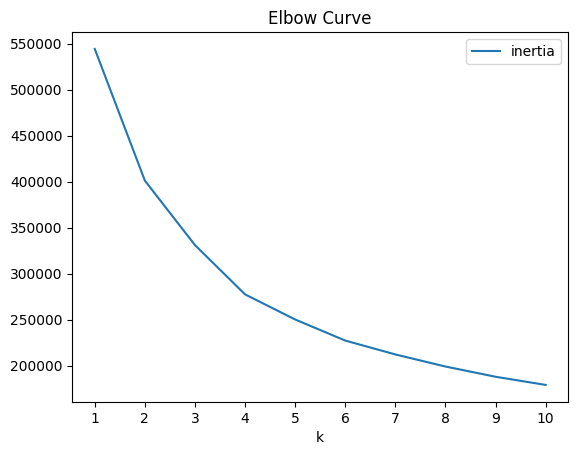

In [ ]:
# Plot the DataFrame
df_elbow.plot(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

In [ ]:
 # Initialize the K-Means model with n_clusters=3
model2 = KMeans(n_clusters=4)

# Fit the model for the df_stocks_pca DataFrame
model2.fit(df_pca)

# Predict the model segments (clusters)
artist_clusters2 = model2.predict(df_pca)

# Print the stock segments
print(artist_clusters2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 3 0 ... 3 0 1]


In [ ]:
 # Create a copy of the df_stocks_pca DataFrame and name it as df_stocks_pca_predictions
df_pca_predictions = df_pca.copy()

# Create a new column in the DataFrame with the predicted clusters
df_pca_predictions["Cluster"] = artist_clusters2

# Review the DataFrame
df_pca_predictions.head()

,PC1,PC2,PC3,PC4,Cluster
Artist+SongCluster,,,,,
Gen Hoshino-Comedy,0.358478,-1.792104,1.303177,0.386112,0
Ben Woodward-Ghost - Acoustic,2.999846,-0.662594,0.923142,0.591789,3
Ingrid Michaelson;ZAYN-To Begin Again,1.510725,-0.817796,0.864030,1.154859,0
Kina Grannis-Can't Help Falling In Love,2.580747,1.859303,2.675021,-1.401909,3
Chord Overstreet-Hold On,0.530174,-0.992485,2.045941,-0.273279,0


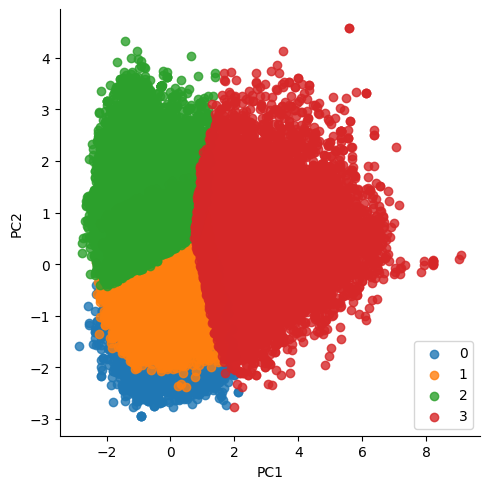

In [ ]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="PC1", y="PC2", data=df_pca_predictions, fit_reg=False, hue='Cluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()

In [ ]:
df_pca_predictions["Cluster"].value_counts()

0    37516
1    30039
2    28055
3    18390
Name: Cluster, dtype: int64

In [ ]:
df_pca_predictions[df_pca_predictions["Cluster"]== 0]

,PC1,PC2,PC3,PC4,Cluster
Artist+SongCluster,,,,,
Gen Hoshino-Comedy,0.358478,-1.792104,1.303177,0.386112,0
Ingrid Michaelson;ZAYN-To Begin Again,1.510725,-0.817796,0.864030,1.154859,0
Chord Overstreet-Hold On,0.530174,-0.992485,2.045941,-0.273279,0
Tyrone Wells-Days I Will Remember,0.489922,-1.391030,0.750202,-0.010003,0
A Great Big World;Christina Aguilera-Say Something,1.287234,0.313115,2.196229,-0.395255,0
...,...,...,...,...,...
Urban Rescue-Alive In You,0.232658,-0.875722,0.022595,1.365334,0
I AM THEY-Amen,0.086572,-0.868531,-0.009916,1.387653,0
Tenth Avenue North-Healing Begins,0.268193,-0.614883,0.275134,0.708874,0
